In [24]:
!ls

0.05x_seg_to_0.5x			  env_name.txt
AI_data20200812.xlsx			  im_dict.pickle
AI_data20200812.xlsx:Zone.Identifier	  split_images.py
HE_10x_exported_0.5x			  train.ipynb
HE_10x_exported_0.5x.zip:Zone.Identifier  train.py
Untitled.ipynb


In [102]:
import pickle
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import np_utils, to_categorical
from keras.models import Sequential, model_from_json
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Conv2D, Flatten, Dense,Dropout


In [26]:
with open("im_dict.pickle", 'rb') as rf:
    im_dict = pickle.load(rf)

In [47]:
case = []
for i in im_dict["case"].values():
    print(len(i))
    case.extend(i)
len(case)

66
63
294
144
170
146
204
36
156
103
414


1796

$$
control = 1796 \times 224 \times 224 
$$

In [50]:
control = []
for i in im_dict["control"].values():
    print(len(i))
    control.extend(i)
len(control)

82
35
16
54
338
22
35
733
109
547
20
252
26
105


2374

$$
control = 2374 \times 224 \times 224 
$$

In [46]:
im_dict["control"].keys()

dict_keys(['H1515720', 'H17058021', 'H1707042', 'H1714440', 'H18006713', 'H1802731', 'H18048612', 'H18051462', 'H1809717', 'H1810053', 'H1811782', 'H1815077', 'H19012573', 'H1903837'])

In [105]:
dense_size = 2

data_x = []
data_y = []
data_x.extend(case)
data_y.extend([1] * len(case))
data_x.extend(control)
data_y.extend([0] * len(control))
assert len(data_x) == len(data_y)

# np.arrayに変換
data_x = np.array(data_x)
data_y = np.array(data_y)

In [106]:
# 学習用データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 正規化
x_train = x_train / 255.0
x_test = x_test / 255.0

In [107]:
# one-hot encording
y_train = to_categorical(y_train, num_classes=dense_size)
y_test = to_categorical(y_test, num_classes=dense_size)

In [108]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3336, 224, 224, 3)
(834, 224, 224, 3)
(3336, 2)
(834, 2)


In [109]:
# モデルの構築
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(dense_size))
model.add(Activation('softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_14 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 111, 111, 64)      18496     
__________

In [ ]:
optimizers ="Adadelta"
results = {}
epochs = 200
model.compile(loss='categorical_crossentropy', optimizer=optimizers, metrics=['accuracy'])
results= model.fit(x_train, y_train, validation_split=0.2, epochs=epochs )

model_json_str = model.to_json()
open('mnist_mlp_model.json', 'w').write(model_json_str)
model.save_weights('mnist_mlp_weights.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2668 samples, validate on 668 samples
Epoch 1/200





  32/2668 [..............................] - ETA: 17:45 - loss: 0.7112 - acc: 0.5312

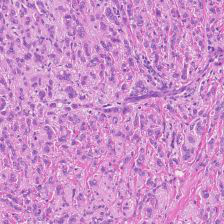

In [16]:
Image.fromarray(im_dict["case"]["H1503586"][0])

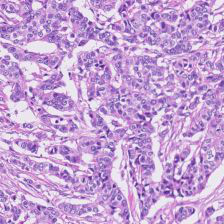

In [29]:
Image.fromarray(im_dict["case"]["H15113112"][0])

In [40]:
a = Image.fromarray(im_dict["control"]["H1515720"][5])
type(a)

PIL.Image.Image